In [14]:
# BVH, Feb 2022.

import os
import pathlib
import sys
for base_dir in [os.getcwd(), str(pathlib.Path(os.getcwd()).parent)]:
    print(base_dir)
    sys.path.append(base_dir)
    sys.path.append(os.path.join(base_dir, 'experimental/'))
    sys.path.append(os.path.join(base_dir, 'third_party/'))
    sys.path.append(os.path.join(base_dir, 'third_party/pyfluidsynth'))
    sys.path.append(os.path.join(base_dir, 'third_party/pyfluidsynth/test'))
    
from __init__ import *

# Library imports.
import IPython.display as idp
import fluidsynth
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal
import time
from IPython.display import Audio
from scipy.io import wavfile

C:\Users\Basile\Repos\music-synth\notebooks
C:\Users\Basile\Repos\music-synth


In [15]:
def plot_waveform(x, Fs, zoom=1):
    plt.figure()
    if zoom > 1:
        x = x[int(len(x) / 2 - len(x) / (zoom * 2)):int(len(x) / 2 + len(x) / (zoom * 2))]
    t = np.arange(len(x)) / Fs
    plt.plot(t, x)
    plt.xlim(0, len(x) / Fs)
    plt.ylim(-1, 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Signal')
    plt.grid()
    plt.show()

def plot_stft(x, Fs):
    f, t, Zxx = scipy.signal.stft(x, Fs, nperseg=256)
    plt.figure()
    plt.pcolormesh(t, f / 1e3, np.abs(Zxx), vmin=0, vmax=0.04, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [kHz]')
    plt.xlabel('Time [s]')
    plt.grid()
    plt.show()
    
def play(x, Fs):
    idp.display(Audio(x, rate=Fs))

In [19]:
if 1:
    import pyaudio
    pa = pyaudio.PyAudio()
    strm = pa.open(
        format = pyaudio.paInt16,
        channels = 2, 
        rate = Fs, 
        output = True)

In [23]:
Fs = 44100
# s = np.zeros(1, dtype=np.float32)
s = []
fl = fluidsynth.Synth()

# Initial silence is 1 second
s = np.append(s, fl.get_samples(Fs * 1))

sfid = fl.sfload("third_party/pyfluidsynth/test/example.sf2")
fl.program_select(0, sfid, 0, 0)

fl.noteon(0, 60, 60)
fl.noteon(0, 67, 60)
fl.noteon(0, 76, 60)

print(np.unique(fl.get_samples(Fs * 1)))

# Chord is held for 2 seconds
s = np.append(s, fl.get_samples(Fs * 2))

fl.noteoff(0, 60)
fl.noteoff(0, 67)
fl.noteoff(0, 76)

# Decay of chord is held for 1 second
s = np.append(s, fl.get_samples(Fs * 1))

fl.delete()

[-1  0  1]


x: (176400,) float64 -1.0 1.0 -0.00013038548752834466


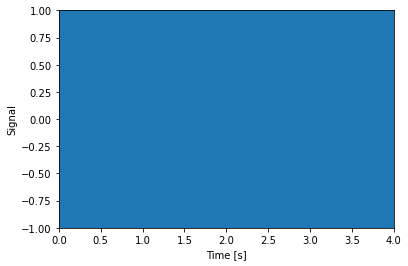

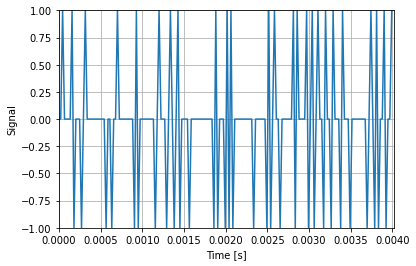

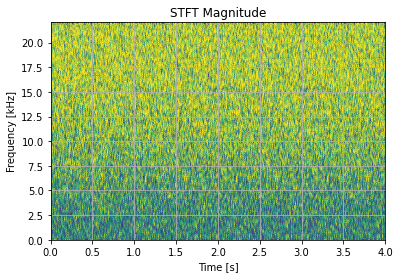

In [24]:
x = s[::2]
print('x:', x.shape, x.dtype, x.min(), x.max(), x.mean())
plot_waveform(x, Fs, zoom=1)
plot_waveform(x, Fs, zoom=1000)
plot_stft(x, Fs)
play(x, Fs)